In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import pickle
import json

import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('pizza_v1.csv')
df

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes
3,A,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no
4,A,"Rp248,000",18.0,mozzarella,double_signature,jumbo,yes,no
...,...,...,...,...,...,...,...,...
124,E,"Rp39,000",8.5,tuna,spicy tuna,small,yes,yes
125,E,"Rp72,000",12.0,tuna,spicy tuna,medium,yes,yes
126,E,"Rp99,000",14.0,tuna,spicy tuna,large,yes,yes
127,E,"Rp44,000",8.5,meat,BBQ_meat_fiesta,small,yes,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       129 non-null    object 
 1   price_rupiah  129 non-null    object 
 2   diameter      129 non-null    float64
 3   topping       129 non-null    object 
 4   variant       129 non-null    object 
 5   size          129 non-null    object 
 6   extra_sauce   129 non-null    object 
 7   extra_cheese  129 non-null    object 
dtypes: float64(1), object(7)
memory usage: 8.2+ KB


### EDA

#### 1.company

In [4]:
df['company']

0      A
1      A
2      A
3      A
4      A
      ..
124    E
125    E
126    E
127    E
128    E
Name: company, Length: 129, dtype: object

In [5]:
df['company'].value_counts()

C    30
E    30
A    25
B    24
D    20
Name: company, dtype: int64

In [6]:
df['company'].replace({'A':0, 'B':1, 'C':2, 'D':3, 'E': 4},inplace = True)

In [7]:
df['company']

0      0
1      0
2      0
3      0
4      0
      ..
124    4
125    4
126    4
127    4
128    4
Name: company, Length: 129, dtype: int64

In [8]:
company_labels = {'A':0, 'B':1, 'C':2, 'D':3, 'E': 4}

## 2. price_rupiah

In [9]:
df["price_rupiah"]

0      Rp235,000
1      Rp198,000
2      Rp120,000
3      Rp155,000
4      Rp248,000
         ...    
124     Rp39,000
125     Rp72,000
126     Rp99,000
127     Rp44,000
128     Rp78,000
Name: price_rupiah, Length: 129, dtype: object

In [10]:
import re
        

In [11]:
a = ""
for data in df['price_rupiah']:
    a = a+str(data)
# print(a)

In [12]:
b = re.findall("[0-9]{2,3}[,][0-9]{3}",a)
# b

In [13]:
list1 = []
for i in b:
    c = re.sub(',','',i)
#     print(c)
    list1.append(int(c))
print(list1)

[235000, 198000, 120000, 155000, 248000, 140000, 110000, 70000, 90000, 90000, 140000, 110000, 70000, 90000, 90000, 140000, 110000, 70000, 90000, 90000, 230000, 188000, 114000, 149000, 149000, 23500, 46000, 72000, 49000, 83000, 96000, 31000, 69000, 93000, 75000, 115000, 123000, 33000, 46000, 72000, 76000, 119000, 126500, 75000, 46000, 72000, 49000, 83000, 96000, 39000, 72000, 99000, 44000, 78000, 105000, 39000, 72000, 99000, 35000, 60000, 98000, 35000, 60000, 98000, 44000, 78000, 105000, 28000, 51000, 84000, 39000, 72000, 99000, 35000, 60000, 98000, 32000, 54000, 92000, 140000, 110000, 70000, 90000, 90000, 230000, 188000, 114000, 149000, 149000, 23500, 46000, 72000, 49000, 83000, 96000, 31000, 69000, 93000, 75000, 115000, 23500, 46000, 72000, 49000, 83000, 96000, 31000, 69000, 93000, 75000, 115000, 123000, 33000, 46000, 72000, 76000, 119000, 126500, 75000, 46000, 72000, 49000, 83000, 96000, 39000, 72000, 99000, 44000, 78000]


In [14]:
df.drop(["price_rupiah"],axis=1,inplace=True)

In [15]:
df["price"]=list1

In [16]:
df

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,price
0,0,22.0,chicken,double_signature,jumbo,yes,yes,235000
1,0,20.0,papperoni,double_signature,jumbo,yes,yes,198000
2,0,16.0,mushrooms,double_signature,reguler,yes,yes,120000
3,0,14.0,smoked beef,double_signature,reguler,yes,no,155000
4,0,18.0,mozzarella,double_signature,jumbo,yes,no,248000
...,...,...,...,...,...,...,...,...
124,4,8.5,tuna,spicy tuna,small,yes,yes,39000
125,4,12.0,tuna,spicy tuna,medium,yes,yes,72000
126,4,14.0,tuna,spicy tuna,large,yes,yes,99000
127,4,8.5,meat,BBQ_meat_fiesta,small,yes,no,44000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       129 non-null    int64  
 1   diameter      129 non-null    float64
 2   topping       129 non-null    object 
 3   variant       129 non-null    object 
 4   size          129 non-null    object 
 5   extra_sauce   129 non-null    object 
 6   extra_cheese  129 non-null    object 
 7   price         129 non-null    int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 8.2+ KB


In [18]:
df

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,price
0,0,22.0,chicken,double_signature,jumbo,yes,yes,235000
1,0,20.0,papperoni,double_signature,jumbo,yes,yes,198000
2,0,16.0,mushrooms,double_signature,reguler,yes,yes,120000
3,0,14.0,smoked beef,double_signature,reguler,yes,no,155000
4,0,18.0,mozzarella,double_signature,jumbo,yes,no,248000
...,...,...,...,...,...,...,...,...
124,4,8.5,tuna,spicy tuna,small,yes,yes,39000
125,4,12.0,tuna,spicy tuna,medium,yes,yes,72000
126,4,14.0,tuna,spicy tuna,large,yes,yes,99000
127,4,8.5,meat,BBQ_meat_fiesta,small,yes,no,44000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       129 non-null    int64  
 1   diameter      129 non-null    float64
 2   topping       129 non-null    object 
 3   variant       129 non-null    object 
 4   size          129 non-null    object 
 5   extra_sauce   129 non-null    object 
 6   extra_cheese  129 non-null    object 
 7   price         129 non-null    int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 8.2+ KB


### 3 . diameter

In [20]:
df["diameter"]

0      22.0
1      20.0
2      16.0
3      14.0
4      18.0
       ... 
124     8.5
125    12.0
126    14.0
127     8.5
128    12.0
Name: diameter, Length: 129, dtype: float64

### 4.topping       

In [21]:
df['topping'].value_counts().to_dict()

{'chicken': 29,
 'mushrooms': 22,
 'mozzarella': 21,
 'smoked beef': 19,
 'tuna': 9,
 'vegetables': 9,
 'meat': 8,
 'black papper': 3,
 'sausage': 3,
 'beef': 3,
 'papperoni': 2,
 'onion': 1}

In [22]:
df['topping'].replace({'chicken': 1,
                         'mushrooms': 2,
                         'mozzarella': 3,
                         'smoked beef': 4,
                         'tuna': 5,
                         'vegetables': 6,
                         'meat': 7,
                         'black papper': 8,
                         'sausage': 9,
                         'beef': 10,
                         'papperoni': 11,
                         'onion': 12},inplace = True)

In [23]:
df['topping']

0       1
1      11
2       2
3       4
4       3
       ..
124     5
125     5
126     5
127     7
128     7
Name: topping, Length: 129, dtype: int64

In [24]:
topping_labels = {'chicken': 1,
                 'mushrooms': 2,
                 'mozzarella': 3,
                 'smoked beef': 4,
                 'tuna': 5,
                 'vegetables': 6,
                 'meat': 7,
                 'black papper': 8,
                 'sausage': 9,
                 'beef': 10,
                 'papperoni': 11,
                 'onion': 12}

### 5. variant

In [25]:
df['variant']

0      double_signature
1      double_signature
2      double_signature
3      double_signature
4      double_signature
             ...       
124          spicy tuna
125          spicy tuna
126          spicy tuna
127     BBQ_meat_fiesta
128     BBQ_meat_fiesta
Name: variant, Length: 129, dtype: object

In [26]:
df['variant'].value_counts().to_dict()

{'classic': 30,
 'meat_lovers': 10,
 'double_mix': 10,
 'crunchy': 10,
 'new_york': 10,
 'double_decker': 9,
 'double_signature': 5,
 'american_favorite': 5,
 'BBQ_meat_fiesta': 5,
 'super_supreme': 5,
 'spicy_tuna': 3,
 'BBQ_sausage': 3,
 'extravaganza': 3,
 'meat_eater': 3,
 'gournet_greek': 3,
 'italian_veggie': 3,
 'thai_veggie': 3,
 'american_classic': 3,
 'neptune_tuna': 3,
 'spicy tuna': 3}

In [27]:
df['variant'].replace({'classic':1,
                        'meat_lovers': 2,
                        'double_mix': 3,
                        'crunchy': 4,
                        'new_york': 5,
                        'double_decker': 6,
                        'double_signature': 7,
                        'american_favorite': 8,
                        'BBQ_meat_fiesta': 9,
                        'super_supreme': 10,
                        'spicy_tuna': 11,
                        'BBQ_sausage': 12,
                        'extravaganza': 13,
                        'meat_eater': 14,
                        'gournet_greek': 15,
                        'italian_veggie': 16,
                        'thai_veggie': 17,
                        'american_classic': 18,
                        'neptune_tuna': 19,
                        'spicy tuna': 20}, inplace=True)


In [57]:
variant_labels ={'classic':1,
                'meat_lovers': 2,
                'double_mix': 3,
                'crunchy': 4,
                'new_york': 5,
                'double_decker': 6,
                'double_signature': 7,
                'american_favorite': 8,
                'BBQ_meat_fiesta': 9,
                'super_supreme': 10,
                'spicy_tuna': 11,
                'BBQ_sausage': 12,
                'extravaganza': 13,
                'meat_eater': 14,
                'gournet_greek': 15,
                'italian_veggie': 16,
                'thai_veggie': 17,
                'american_classic': 18,
                'neptune_tuna': 19,
                'spicy tuna': 20}

In [28]:
df["size"].value_counts().to_dict()

{'medium': 41, 'small': 22, 'large': 21, 'reguler': 20, 'jumbo': 15, 'XL': 10}

In [29]:
df["size"].replace({'medium': 1, 'small': 2, 'large': 3, 'reguler': 4, 'jumbo': 5, 'XL': 6},inplace=True)

In [30]:
size_labels = {'medium': 1, 'small': 2, 'large': 3, 'reguler': 4, 'jumbo': 5, 'XL': 6}

### 7 . extra_sauce

In [31]:
df["extra_sauce"].value_counts().to_dict()

{'yes': 76, 'no': 53}

In [32]:
df["extra_sauce"].replace({'yes': 1, 'no': 0},inplace=True)

In [33]:
extra_sauce_labels = {'yes': 1, 'no': 0}

### 8 . extra_cheese

In [34]:
df["extra_cheese"].value_counts().to_dict()

{'yes': 86, 'no': 43}

In [35]:
df["extra_cheese"].replace({'yes': 1 , 'no': 0},inplace=True)

In [36]:
extra_cheese_labels = {'yes': 1 , 'no': 0}

In [37]:
df

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,price
0,0,22.0,1,7,5,1,1,235000
1,0,20.0,11,7,5,1,1,198000
2,0,16.0,2,7,4,1,1,120000
3,0,14.0,4,7,4,1,0,155000
4,0,18.0,3,7,5,1,0,248000
...,...,...,...,...,...,...,...,...
124,4,8.5,5,20,2,1,1,39000
125,4,12.0,5,20,1,1,1,72000
126,4,14.0,5,20,3,1,1,99000
127,4,8.5,7,9,2,1,0,44000


## Feature Engineering

### Linearity

<Axes: >

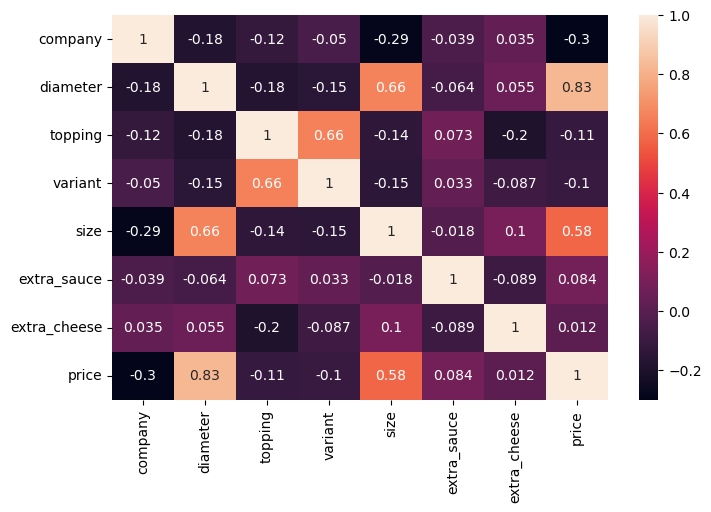

In [38]:
plt.figure(figsize = (8,5))
sns.heatmap(df.corr(), annot = True)

<Axes: >

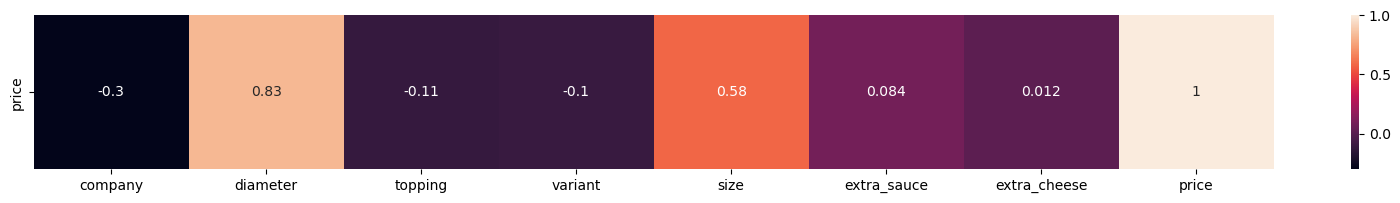

In [39]:
plt.figure(figsize = (20,2))
sns.heatmap(df.corr().tail(1), annot = True)

# Model Training

In [40]:
df

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,price
0,0,22.0,1,7,5,1,1,235000
1,0,20.0,11,7,5,1,1,198000
2,0,16.0,2,7,4,1,1,120000
3,0,14.0,4,7,4,1,0,155000
4,0,18.0,3,7,5,1,0,248000
...,...,...,...,...,...,...,...,...
124,4,8.5,5,20,2,1,1,39000
125,4,12.0,5,20,1,1,1,72000
126,4,14.0,5,20,3,1,1,99000
127,4,8.5,7,9,2,1,0,44000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       129 non-null    int64  
 1   diameter      129 non-null    float64
 2   topping       129 non-null    int64  
 3   variant       129 non-null    int64  
 4   size          129 non-null    int64  
 5   extra_sauce   129 non-null    int64  
 6   extra_cheese  129 non-null    int64  
 7   price         129 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 8.2 KB


In [42]:
x = df.drop(['price'],axis = 1) 
y = df['price'] 
# x
# y
x.head(2)

,company,diameter,topping,variant,size,extra_sauce,extra_cheese
0,0,22.0,1,7,5,1,1
1,0,20.0,11,7,5,1,1


### Train Test Split

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=32)

In [44]:
x_train.head(1)

,company,diameter,topping,variant,size,extra_sauce,extra_cheese
28,1,12.0,3,4,1,0,0


In [45]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

## Model Evaluation

In [46]:
linear_reg.predict(x_test)[5:10]

array([ 42675.78995004, 108142.71296136, 111952.41153573,  28804.36244085,
        90437.47709574])

In [47]:
linear_reg.intercept_

-44813.824469972766

In [48]:
np.around(linear_reg.coef_,2)

array([-5476.71, 10671.72,  -436.6 ,   119.13,   740.64, 12244.17,
       -5119.49])

In [49]:
# Testing Data Evaluation
y_pred_test = linear_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error      :", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_test, y_pred_test)
print("Mean Absolute Error     :",mae)

r2_value = r2_score(y_test,y_pred_test)
print("R-Squared Value         :",r2_value)

n = x_test.shape[0]
k = x_test.shape[1]
adj_r2 = 1 - ((1 - r2_value) * (n-1))/(n-k-1)
print("Adjusted R-Squared Value:",adj_r2)

Mean Squared Error      : 537878990.7049079
Root Mean Squared Error : 23192.218322206867
Mean Absolute Error     : 17864.0226901014
R-Squared Value         : 0.7719593863099456
Adjusted R-Squared Value: 0.68327692543048


In [50]:
# Training Data Evaluation
y_pred_train = linear_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred_train)
print("Mean Squared Error      :", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_test, y_pred_train)
print("Mean Absolute Error     :",mae)

r2_value = r2_score(y_test,y_pred_train)
print("R-Squared Value         :",r2_value)

n = x_test.shape[0]
k = x_test.shape[1]
adj_r2 = 1 - ((1 - r2_value) * (n-1))/(n-k-1)
print("Adjusted R-Squared Value:",adj_r2)

Mean Squared Error      : 537878990.7049079
Root Mean Squared Error : 23192.218322206867
Mean Absolute Error     : 17864.0226901014
R-Squared Value         : 0.7719593863099456
Adjusted R-Squared Value: 0.68327692543048


## Single Row Testing

In [51]:
x_test[12:13]

,company,diameter,topping,variant,size,extra_sauce,extra_cheese
63,2,14.0,7,14,3,1,1


In [52]:
linear_reg.predict(x_test[12:13])[0]

101595.09921048734

In [53]:
column_names = x.columns.tolist()
column_names

['company',
 'diameter',
 'topping',
 'variant',
 'size',
 'extra_sauce',
 'extra_cheese']

In [54]:
linear_reg.n_features_in_

7

In [56]:
company = "A"
diameter = 24.00
topping = "tuna"
variant = "spicy tuna"
size = "small"
extra_sauce = "yes"
extra_cheese = "no"

In [58]:
company = "A"
diameter = 24.00
topping = "tuna"
variant = "spicy tuna"
size = "small"
extra_sauce = "yes"
extra_cheese = "no"

company = company_labels[company]
topping = topping_labels[topping]
variant = variant_labels[variant]
size = size_labels[size]
extra_sauce = extra_sauce_labels[extra_sauce]
extra_cheese = extra_cheese_labels[extra_cheese]

test_array = np.zeros([1,linear_reg.n_features_in_])
test_array[0,0] = company
test_array[0,1] = diameter
test_array[0,2] = topping
test_array[0,3] = variant
test_array[0,4] = size
test_array[0,5] = extra_sauce
test_array[0,6] = extra_cheese


predicted_price = np.around(linear_reg.predict(test_array)[0],3)
predicted_price

225232.571

In [59]:
with open('linear_regression.pkl','wb') as f:
    pickle.dump(linear_reg, f)

In [60]:
project_data = {'company':company_labels,'topping':topping_labels,
                'variant':variant_labels,"size":size_labels,
                'extra_sauce':extra_sauce_labels,
                'extra_cheese':extra_cheese_labels,'column_names':column_names}

with open('proj_data.json','w') as f:
    json.dump(project_data, f)